In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics import *

In [3]:
true = pd.read_csv('True.csv.zip')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake = pd.read_csv('Fake.csv.zip')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true['class'] = 1
fake['class'] = 0

In [6]:
news = pd.concat([true , fake]).reset_index()

In [7]:
del news['index']

In [8]:
news

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [9]:
news['text'] = news['title'] + ' ' + news['text']

In [10]:
del news['title']

In [11]:
news['text'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
stop = set(stopwords.words('english'))

In [14]:
def text_processing(text):
    text_clean = [c for c in text if c not in string.punctuation]
    text_clean = ''.join(text_clean)
    text_clean = [word for word in text_clean.split() if word.lower() not in stop]
    text_clean = ' '.join(text_clean)
    return text_clean

In [15]:
text_processing(news['text'][0])

'US budget fight looms Republicans flip fiscal script WASHINGTON Reuters head conservative Republican faction US Congress voted month huge expansion national debt pay tax cuts called “fiscal conservative” Sunday urged budget restraint 2018 keeping sharp pivot way among Republicans US Representative Mark Meadows speaking CBS’ “Face Nation” drew hard line federal spending lawmakers bracing battle January return holidays Wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even November congressional election campaigns approach Republicans seek keep control Congress President Donald Trump Republicans want big budget increase military spending Democrats also want proportional increases nondefense “discretionary” spending programs support education scientific research infrastructure public health environmental protection “The Trump administration already willing say ‘We’re going increase nondefense discretionary spending 7 percent’” Meadows chai

In [16]:
len(news['text'][0])

4724

In [17]:
len(text_processing(news['text'][0]))

3505

In [18]:
news['text_clean'] = news['text'].apply(text_processing)

In [19]:
news.sample(5)

,text,subject,date,class,text_clean
21304,U.S. navy recovers remains of all sailors miss...,worldnews,"August 28, 2017",1,US navy recovers remains sailors missing USS M...
7539,Social media helps U.S. millennial voters regi...,politicsNews,"November 6, 2016",1,Social media helps US millennial voters regist...
28037,WATCH: Film About Barack And Michelle Set To ...,News,"April 30, 2016",0,WATCH Film Barack Michelle Set Debut Plot Amaz...
39188,WATCH: SANCTIMONIOUS ANTI-TRUMP Hollywood IMPL...,left-news,"Oct 23, 2017",0,WATCH SANCTIMONIOUS ANTITRUMP Hollywood IMPLOD...
36572,US Spends Over $500 Million To Train Syrian Re...,politics,"Sep 27, 2015",0,US Spends 500 Million Train Syrian Rebels Give...


In [20]:
plt.style.use('bmh')

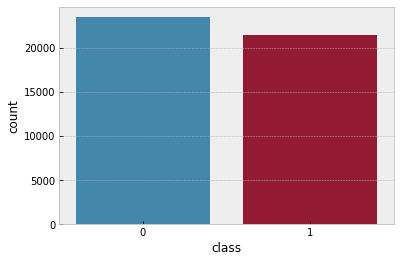

In [21]:
sns.countplot(data=news , x='class');

In [22]:
news['text_len'] = news['text_clean'].map(len)

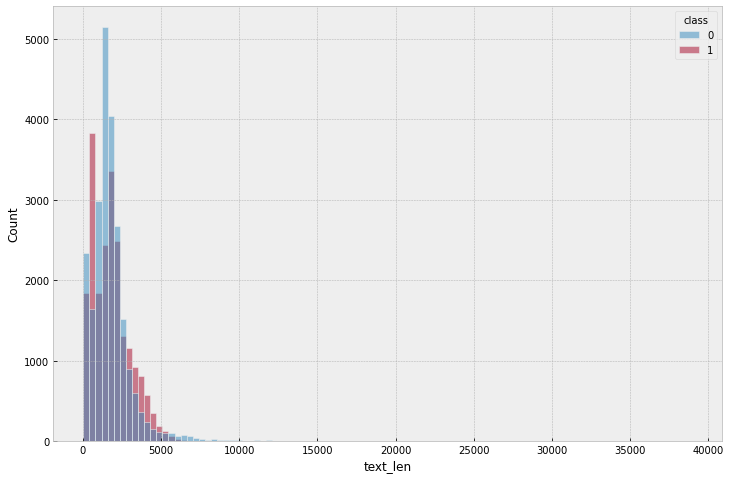

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data=news , x='text_len' , hue='class' , bins=100);

In [24]:
true_news = news[news['class'] == 1]['text_clean']
fake_news = news[news['class'] == 0]['text_clean']

In [25]:
true_news.sample(3)

16885    Zuma given November 30 deadline ahead South Af...
20816    Trump administration blacklists three official...
17068    UKs May meet Bill Clinton discuss Northern Ire...
Name: text_clean, dtype: object

In [26]:
fake_news.sample(3)

35583    BREAKING CRUZ WINS BIG WISCONSIN…But Get 1237 ...
33123    WOW NEW YORK TIMES ADMITS “Cooked Numbers” Kee...
43597    TRUMPDOM Curious World Trump’s Foreign Policy ...
Name: text_clean, dtype: object

In [27]:
true_count = true_news.map(lambda x : [word.lower() for word in x.split()])
fake_count = fake_news.map(lambda x : [word.lower() for word in x.split()])

In [28]:
count = Counter()
for i in true_count:
    count.update(i)
true_most30 = count.most_common(30)

In [29]:
count = Counter()
for i in fake_count:
    count.update(i)
fake_most30 = count.most_common(30)

In [30]:
true_most30 = pd.DataFrame(true_most30 , columns=['text' , 'len'])
fake_most30 = pd.DataFrame(fake_most30 , columns=['text' , 'len'])

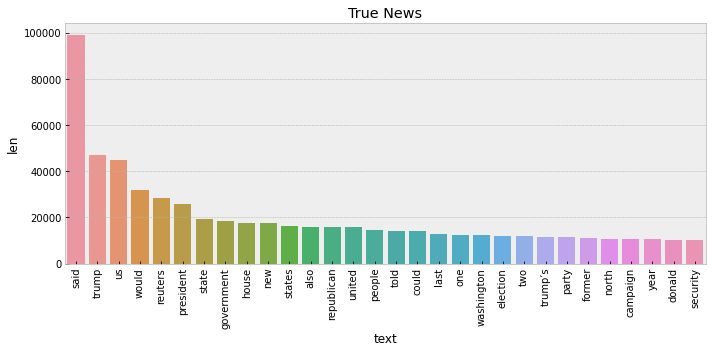

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(data=true_most30 , y='len' , x='text')
plt.title('True News')
plt.xticks(rotation=90)
plt.tight_layout();

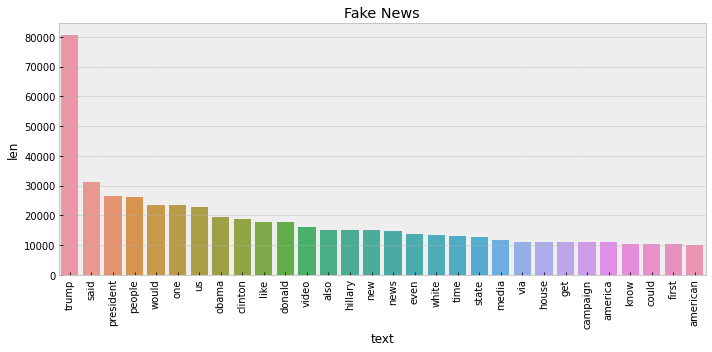

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=fake_most30 , y='len' , x='text')
plt.title('Fake News')
plt.xticks(rotation=90)
plt.tight_layout();

In [33]:
features = news['text_clean']
target = news['class']

In [34]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , shuffle=True)

### By TfidfVectorizer

In [35]:
tv = TfidfVectorizer()

In [36]:
x_train_tv = tv.fit_transform(x_train)
x_test_tv = tv.transform(x_test)

In [37]:
model = MultinomialNB()

In [38]:
model.fit(x_train_tv , y_train)

MultinomialNB()

In [39]:
model.score(x_train_tv , y_train)

0.9544518068934796

In [40]:
model.score(x_test_tv , y_test)

0.9455456570155902

In [41]:
y_pred = model.predict(x_test_tv)

In [42]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4673
           1       0.94      0.95      0.94      4307

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



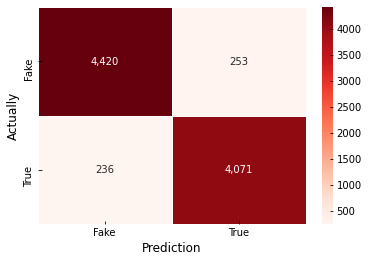

In [43]:
conf_mat = pd.DataFrame(confusion_matrix(y_test , y_pred) , index=['Fake' , 'True'] , columns=['Fake' , 'True'])
sns.heatmap(data=conf_mat , annot=True , fmt=',.0f' , cmap='Reds' , linewidths=1)
plt.xlabel('Prediction')
plt.ylabel('Actually');

### By CountVectorizer

In [44]:
cv = CountVectorizer()

In [45]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [46]:
model = MultinomialNB()

In [47]:
model.fit(x_train_cv , y_train)

MultinomialNB()

In [48]:
model.score(x_train_cv , y_train)

0.9706553817027674

In [49]:
model.score(x_test_cv , y_test)

0.9615812917594655

In [50]:
y_pred = model.predict(x_test_cv)

In [51]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4673
           1       0.95      0.97      0.96      4307

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



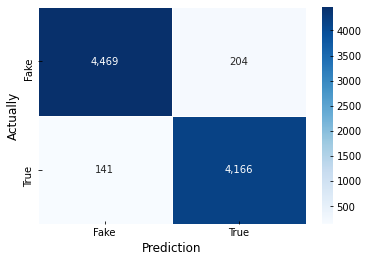

In [52]:
conf_mat = pd.DataFrame(confusion_matrix(y_test , y_pred) , index=['Fake' , 'True'] , columns=['Fake' , 'True'])
sns.heatmap(data=conf_mat , annot=True , fmt=',.0f' , cmap='Blues' , linewidths=1)
plt.xlabel('Prediction')
plt.ylabel('Actually');